# Identifying iris species from sepal and petal dimensions

The `sklearn` module of python comes with a few data sets and one of them is iris data set. We will use this data set to build model that identifies the species of the iris plants using the lengths and widths of the sepals and petals.

## Load the required modules
We will use the following python modules for this study.

1. `sklearn`
1. `numpy`
1. `pandas`
1. `matplotlib`
1. `seaborn`

In [1]:
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

## Load the iris data set
Let's load the iris data set from the `sklearn` module and store it as a `pandas` dataframe.

In [2]:
iris = datasets.load_iris()
iris_data = pd.DataFrame(data = np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['target'])
target_dictionary = dict(zip([0, 1, 2], iris['target_names']))
iris_data.rename(columns={'sepal length (cm)': 'sepal_length'
                          , 'sepal width (cm)' : 'sepal_width'
                          , 'petal length (cm)' : 'petal_length'
                          , 'petal width (cm)': 'petal_width'}, inplace=True)
iris_data['target'] = iris_data['target'].map(target_dictionary)
iris_data.head()

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


## Exploratory data analysis

Let's explore how different variables are distributed and how are they related to the `target` variable and with each other.

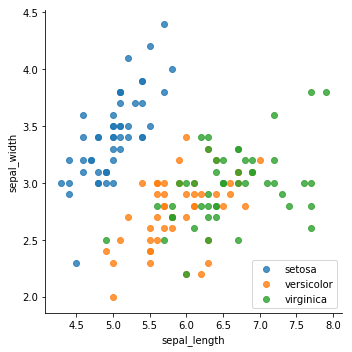

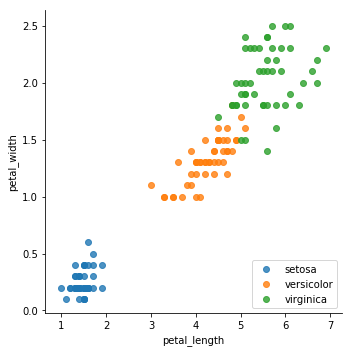

In [3]:
sns.lmplot(x="sepal_length", y="sepal_width", data=iris_data, fit_reg=False, hue='target', legend=False)
plt.legend(loc='lower right')
plt.show()

sns.lmplot(x="petal_length", y="petal_width", data=iris_data, fit_reg=False, hue='target', legend=False)
plt.legend(loc='lower right')
plt.show()

It seems like the variables $sepal\_length$ and $sepal\_width$ do have some _say_ in determining the species of the iris plants. 

The species patterns in the case of $petal\_width$ and $petal\_length$ is much stronger and the linear pattern also suggests that the two variables $petal\_width$ and $petal\_length$ are strongly correlated. We may want to test if the two variables are redundent and one just one of these is enough to determine the species.

In [4]:
iris_data.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.109369,0.871754,0.817954
sepal_width,-0.109369,1.000000,-0.420516,-0.356544
petal_length,0.871754,-0.420516,1.000000,0.962757
petal_width,0.817954,-0.356544,0.962757,1.000000


As expected $petal\_length$ and $petal\_width$ are strogly correlated. It may be better to use only one of these variables to fit the model. We will test that further later on. Also note that the $sepal\_width$ and $petal\_length$ have a weak and negative relationship between each other. That is an interesting observation; the longer the petals of an iris plant the shorter span sepals will have.

### Sepal Length
Let's explore how the $sepal\_length$ variable is distributed.

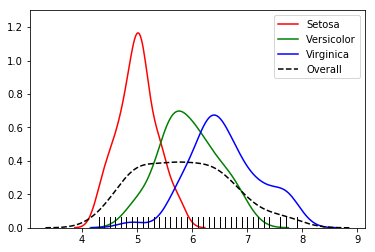

In [5]:
target_setosa = iris_data.loc[iris_data['target'] == 'setosa']
target_versicolor = iris_data.loc[iris_data['target'] == 'versicolor']
target_virginica = iris_data.loc[iris_data['target'] == 'virginica']

sns.distplot(target_setosa[['sepal_length']], hist=False, rug=True, color='r', label='Setosa')
sns.distplot(target_versicolor[['sepal_length']], hist=False, rug=True, color='g', label = 'Versicolor')
sns.distplot(target_virginica[['sepal_length']], hist=False, rug=True, color='b', label = 'Virginica')
sns.distplot(iris_data[['sepal_length']], hist=False, rug=True, color='black', kde_kws={'linestyle':'--'}, label = 'Overall')
plt.ylim(0, 1.3)
plt.legend()
plt.show()

The $sepal\_length$ is distributed 'approximately normally' (slightly skewed to the right) within each group and overall as well (as shown by the _dashed_ black curve). It is evident from the the distribution curves that $sepal\_length$ does indeed play a role in determining the specie of the iris plant. Setosa specie has the shortest sepals while Virginica specie has the longest ones. The specie Versicolor has sepals lengths somewhat in the middle on average.
### Sepal Width
Now let's explore $sepal\_width$ and see how is this distributed and does this play some part in determining the specie of the plant.

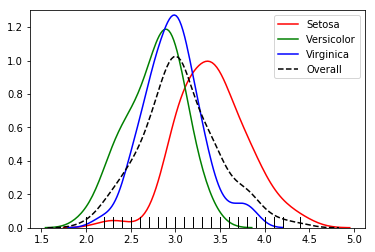

In [6]:
sns.distplot(target_setosa[['sepal_width']], hist=False, rug=True, color='r', label='Setosa')
sns.distplot(target_versicolor[['sepal_width']], hist=False, rug=True, color='g', label = 'Versicolor')
sns.distplot(target_virginica[['sepal_width']], hist=False, rug=True, color='b', label = 'Virginica')
sns.distplot(iris_data[['sepal_width']], hist=False, rug=True, color='black', kde_kws={'linestyle':'--'}, label = 'Overall')
plt.ylim(0, 1.3)
plt.legend()
plt.show()

Again, the variable $sepal\_width$ seems to have some impact on determining the specie of the iris plants. Also, the $sepal\_width$ is nomally distributed overall and is approximately normal within each group of plants.
## Petal Length
The distribution of the variable $petal\_width$ is shown here

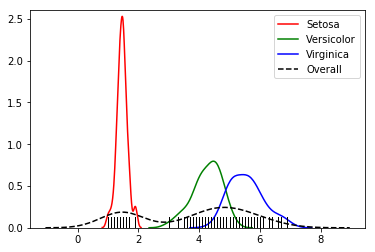

In [7]:
sns.distplot(target_setosa[['petal_length']], hist=False, rug=True, color='r', label='Setosa')
sns.distplot(target_versicolor[['petal_length']], hist=False, rug=True, color='g', label = 'Versicolor')
sns.distplot(target_virginica[['petal_length']], hist=False, rug=True, color='b', label = 'Virginica')
sns.distplot(iris_data[['petal_length']], hist=False, rug=True, color='black', kde_kws={'linestyle':'--'}, label = 'Overall')
plt.ylim(0, 2.6)
plt.legend()
plt.show()

The variable $petal\_length$ seems to be very strong indicator of differentiating the Setosa specie from the other two which seems to have the shortest petals. The petals of Virginica specie are the longest but there is still some overlap of their lengths with the lengths of the petals of Versicolor plants. The overall distribution is nearly binomial whihle the distribution of each categories is close to normal(slightly left skewed for Versicolor specie).

### Petal Width
Lets look at the distribution of the $petal\_width$

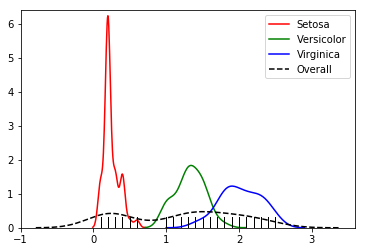

In [8]:
sns.distplot(target_setosa[['petal_width']], hist=False, rug=True, color='r', label='Setosa')
sns.distplot(target_versicolor[['petal_width']], hist=False, rug=True, color='g', label = 'Versicolor')
sns.distplot(target_virginica[['petal_width']], hist=False, rug=True, color='b', label = 'Virginica')
sns.distplot(iris_data[['petal_width']], hist=False, rug=True, color='black', kde_kws={'linestyle':'--'}, label = 'Overall')
plt.ylim(0, 6.4)
plt.legend()
plt.show()

The distribution of this variable is very similar to $petal\_length$ as expected from the correlation value of 0.96 suggests.

## Model

In [12]:
mod_log = LogisticRegression(multi_class = 'multinomial', solver = 'newton-cg', random_state = 0)
mod_log.fit(iris_data.drop(labels=['target'], axis = 1), iris_data['target'])
iris_data['target_pred'] = mod_log.predict(iris_data.drop(labels=['target'], axis = 1))
iris_data

,sepal_length,sepal_width,petal_length,petal_width,target,target_pred
0,5.1,3.5,1.4,0.2,setosa,setosa
1,4.9,3.0,1.4,0.2,setosa,setosa
2,4.7,3.2,1.3,0.2,setosa,setosa
3,4.6,3.1,1.5,0.2,setosa,setosa
4,5.0,3.6,1.4,0.2,setosa,setosa
5,5.4,3.9,1.7,0.4,setosa,setosa
6,4.6,3.4,1.4,0.3,setosa,setosa
7,5.0,3.4,1.5,0.2,setosa,setosa
8,4.4,2.9,1.4,0.2,setosa,setosa
9,4.9,3.1,1.5,0.1,setosa,setosa


In [ ]:
i